# 贝叶斯新闻分类任务

在这个任务中，我们使用贝叶斯算法来对新闻数据进行分类。以下是处理和分类新闻数据的主要步骤：

## 新闻数据集处理
爬取的新闻数据需要经过多个预处理步骤才能用于模型训练。

- **文本预处理**：原始新闻文本包含许多无关内容，需要进行清洗和格式化，以便更有效地进行分词和特征提取。

## 文本分词
文本处理的基础是将连续的文本内容分解成单独的词或短语。

- **分词**：将文章分解成单独的词汇，这是文本分析的基本步骤。

## 去停用词
去除那些在文本中频繁出现但对理解文章含义贡献不大的词汇。

- **清理停用词**：如“的”、“是”等词对分类贡献不大，应从文本中移除。

## 构建文本特征
特征选择和构建是自然语言处理中的核心，直接关系到分类器的性能。

- **特征构建**：我们将实验不同的特征构建方法，比如词频（TF）和逆文档频率（IDF），来找出最有效的特征表示。

## 贝叶斯分类
利用处理好的特征，通过贝叶斯算法完成文本分类。

- **分类模型**：应用贝叶斯算法对新闻文章进行分类，将文章归入预定义的类别中。

    通过这一系列步骤，我们能够构建一个能够自动分类新闻文章的模型，进而提高信息处理的效率和准确性。
---
# Bayesian News Classification Task

In this task, we employ the Bayesian algorithm to classify news data. Below are the main steps in processing and classifying the news data:

## News Dataset Processing
The crawled news data requires several preprocessing steps before it can be used for model training.

- **Text Preprocessing**: The raw news text contains many irrelevant elements and needs to be cleaned and formatted for effective tokenization and feature extraction.

## Text Tokenization
The foundation of text processing is breaking down continuous text content into individual words or phrases.

- **Tokenization**: Decomposing articles into individual words is a fundamental step in text analysis.

## Removing Stop Words
Eliminating words that frequently appear in the text but do not contribute significantly to the understanding of the content.

- **Stop Words Cleaning**: Words like "the", "is", etc., have little contribution to classification and should be removed from the text.

## Building Text Features
Feature selection and construction are at the core of natural language processing, directly affecting the performance of the classifier.

- **Feature Construction**: We will experiment with different feature construction methods, such as Term Frequency (TF) and Inverse Document Frequency (IDF), to find the most effective feature representation.

## Bayesian Classification
With the processed features, complete the text classification using the Bayesian algorithm.

- **Classification Model**: Apply the Bayesian algorithm to categorize news articles into predefined categories.

    Through these steps, we can build a model that automatically classifies news articles, thereby improving the efficiency and accuracy of information processing.

In [1]:
#读取数据，查看分布
import pandas as pd
import jieba
df_news = pd.read_csv('./data/news_data.csv',encoding='utf-8')
df_news = df_news.dropna()
df_news.columns = ['keyword','title','source','time','summary']
df_news.columns = [col.strip() for col in df_news.columns]
df_news.tail()

,keyword,title,source,time,summary
4643,Apple,AirPods Pro 2不支持无损音频传输?苹果工程师给出答案,天极网,2022年11月28日,不过AirPods Pro 2同样继承苹果音频设备不支持无损音频传输的传统，即使它已经升级到...
4644,Apple,"苹果Q4财报:收入和净利润创纪录,下一季增速将放缓",澎湃新闻客户端,未知时间,Q4是苹果的重点季度，因为每年最重要的秋季新品发布会都在这个季度举行，也是苹果产品的销售旺季...
4645,Apple,四百多块买的苹果MagSafe外接电池是智商税吗?,太平洋科技,2022年6月14日,在此，我想引用苹果官网上对抛光布的描述：“这块抛光布可安全有效地清洁各款Apple显示屏，包...
4646,Apple,3 万亿:苹果迈向富可敌国的 5 个关键词,极客公园,未知时间,首发搭载 M1 芯片的三款电脑｜Apple 但因为采用自研芯片，Mac 拥有了更多可能性。它...
4647,Apple,"苹果AirPods 3深度体验:全新设计、音质飙升,比Pro还值",极果,2021年11月20日,目前，除了苹果自家的 Apple Music，主流的第三方音乐、视频 App 都支持了空间音...


In [2]:
#去除未知时间的序列
df_news.shape
df_news.describe()
df_news.columns
df_news = df_news[df_news['time'] != '未知时间']
df_news

(4648, 5)

,keyword,title,source,time,summary
count,4648,4648,4648,4648,4648
unique,56,4226,621,1787,4255
top,海外投资,21经济网 - 21世纪经济报道官方网站,央视网,未知时间,"21经济网是21世纪经济报道门户网站,主打财经新闻,是21世纪经济报道原创新闻最重要的展现平..."
freq,119,10,792,1004,10


Index(['keyword', 'title', 'source', 'time', 'summary'], dtype='object')

,keyword,title,source,time,summary
0,国际政治,中方呼吁国际社会加紧推动苏丹问题政治解决,闽南网,昨天11:35,"新华社联合国3月7日电 中国常驻联合国代表团临时代办戴兵7日在安理会苏丹问题公开会上发言,呼..."
1,国际政治,王毅:联合国作用只能加强不能削弱,中华人民共和国外交部,前天11:20,"面对气候威胁,我们支持联合国应对气变国际合作,将用历史上最短时间完成全球最高碳排放强度降幅。..."
5,国际政治,"共话“政治世界的治理与秩序”,第四届政治学与国际关系学院联盟...",澎湃新闻客户端,2023年11月19日,11月18日，第四届政治学与国际关系学院联盟（USPIR）院长论坛在复旦大学举行。来自“一带...
6,国际政治,美国须停止损害国际气候合作的政治基础,央视网,2023年10月7日,"《联合国气候变化框架公约》是全球应对气候变化的国际法律基础,共同但有区别的责任原则是气候公约..."
7,国际政治,中方敦促国际社会推动政治解决乌克兰危机,央视网,2023年7月19日,"新华社联合国7月18日电 中国常驻联合国副代表耿爽18日在联大审议乌克兰问题时发言,敦促国际..."
...,...,...,...,...,...
4639,Apple,"为打造数字化医疗“Apple store”,西门子医疗正从头开始构建AI能力",钛媒体官方网站,2019年2月28日,"在西门子医疗的规划中,teamplay平台相当于“Apple store”,可以解决标准化的..."
4642,Apple,"苹果手表能测血糖了?耗资数亿美元,「登月级」进步直指医学圣杯",IT之家,2023年2月24日,"研发12 年,苹果无创血糖监测「登月级」项目取得了重大突破。不为人知的是,这一项目早在乔布斯..."
4643,Apple,AirPods Pro 2不支持无损音频传输?苹果工程师给出答案,天极网,2022年11月28日,不过AirPods Pro 2同样继承苹果音频设备不支持无损音频传输的传统，即使它已经升级到...
4645,Apple,四百多块买的苹果MagSafe外接电池是智商税吗?,太平洋科技,2022年6月14日,在此，我想引用苹果官网上对抛光布的描述：“这块抛光布可安全有效地清洁各款Apple显示屏，包...


In [3]:
#数据清洗
#查看下要处理的内容
content = df_news.summary.values.tolist()
print(content[1000])
#中文分词
content_S = []
for line in content:
    #对每篇文章进行分词
    current_segment = jieba.lcut(line)
    
    if len(current_segment) > 1 and current_segment != '\n':
        content_S.append(current_segment)
content_S

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/zq/phwb40j56ld82zb697zgghc80000gn/T/jieba.cache


接下来,区块链将迎来怎样的新机遇? 在2019数博会“ 区块链—数字文明的基石”高端对话现场,工业和信息化部信息化和软件服务业司副司长李冠宇就区块链的发展发出重要的政策信号。 作为行业管理部门,李冠宇表示,工信部将努力推动区块链相关...


Loading model cost 0.338 seconds.
Prefix dict has been built successfully.


[['新华社',
  '联合国',
  '3',
  '月',
  '7',
  '日电',
  ' ',
  '中国',
  '常驻',
  '联合国',
  '代表团',
  '临时代办',
  '戴兵',
  '7',
  '日',
  '在',
  '安理会',
  '苏丹',
  '问题',
  '公开',
  '会上',
  '发言',
  ',',
  '呼吁',
  '国际',
  '社会',
  '加紧',
  '推动',
  '苏丹',
  '问题',
  '政治',
  '解决',
  '。',
  ' ',
  '戴兵',
  '说',
  ',',
  '苏丹',
  '冲突',
  '持续',
  '延宕',
  ',',
  '造成',
  '大量',
  '平民',
  '伤亡',
  '和',
  '严重',
  '人',
  '道',
  '危机',
  ',',
  '令人',
  '痛惜',
  '。',
  '国际',
  '社会',
  '应',
  '共同努力',
  ',',
  '推动',
  '苏丹',
  '问题',
  '政治',
  '...'],
 ['面对',
  '气候',
  '威胁',
  ',',
  '我们',
  '支持',
  '联合国',
  '应对',
  '气变',
  '国际',
  '合作',
  ',',
  '将',
  '用',
  '历史',
  '上',
  '最',
  '短时间',
  '完成',
  '全球',
  '最高',
  '碳',
  '排放',
  '强度',
  '降幅',
  '。',
  ' ',
  '王毅',
  '说',
  ',',
  '联合国',
  '也',
  '需要',
  '与时俱进',
  ',',
  '不断',
  '改革',
  '完善',
  ',',
  '适应',
  '国际',
  '政治经济',
  '发展',
  '的',
  '新',
  '现实',
  ',',
  '提升',
  '发展中国家',
  '的',
  '代表性',
  '和',
  '发言权',
  '。',
  '大国',
  '尤其',
  '要',
  '承担责任',
  ',',
  '推动',
  '联',
  '...'],


In [4]:
#展示分词后的结果
df_content = pd.DataFrame({'content_S': content_S})
df_content.head()
#清除停词后的结果
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
    
contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)
print(contents_clean,all_words)

,content_S
0,"[新华社, 联合国, 3, 月, 7, 日电, , 中国, 常驻, 联合国, 代表团, 临..."
1,"[面对, 气候, 威胁, ,, 我们, 支持, 联合国, 应对, 气变, 国际, 合作, ,..."
2,"[11, 月, 18, 日, ，, 第四届, 政治学, 与, 国际关系学院, 联盟, （, ..."
3,"[《, 联合国, 气候变化, 框架, 公约, 》, 是, 全球, 应对, 气候变化, 的, ..."
4,"[新华社, 联合国, 7, 月, 18, 日电, , 中国, 常驻, 联合国, 副, 代表..."


[['联合国', '日电', ' ', '中国', '常驻', '联合国', '代表团', '临时代办', '戴兵', '安理会', '苏丹', '公开', '会上', '发言', '呼吁', '国际', '社会', '加紧', '推动', '苏丹', '政治', '解决', ' ', '戴兵', '说', '苏丹', '冲突', '持续', '延宕', '平民', '伤亡', '道', '危机', '令人', '痛惜', '国际', '社会', '应', '共同努力', '推动', '苏丹', '政治'], ['面对', '气候', '威胁', '支持', '联合国', '应对', '气变', '国际', '合作', '历史', '短时间', '全球', '碳', '排放', '强度', '降幅', ' ', '王毅', '说', '联合国', '与时俱进', '改革', '完善', '国际', '政治经济', '发展', '新', '现实', '提升', '发展中国家', '代表性', '发言权', '大国', '承担责任', '推动', '联'], ['政治学', '国际关系学院', '联盟', 'USPIR', '院长', '论坛', '复旦大学', '一带', '一路', '沿线', '国家', '大学', '政治学', '国际关系学院', '院长', '系主任', '围绕', '论坛', '主题', '政治', '世界', '治理', '秩'], ['联合国', '气候变化', '框架', '公约', '全球', '应对', '气候变化', '国际', '法律', '基础', '区别', '责任', '原则', '气候', '公约', '基石', '中国', '气候', '公约', '发展中国家', '地位', '法律', '事实', '美国', '挑战', '区别', '责任', '原则', '势必', '严重破坏', '国际', '气候', '合作', '政治', '基础'], ['联合国', '日电', ' ', '中国', '常驻', '联合国', '副', '代表', '耿爽', '联大', '审议', '乌克兰', '发言', '敦促', '国际', '社会', '加大', '劝', '促谈', '力度', '推动', '乌克兰', '危机'

In [5]:
#处理清洗后的字
df_all_words = pd.DataFrame({'all_words': all_words})
words_count = df_all_words.groupby('all_words').size().reset_index(name='count')
words_count = words_count.sort_values(by='count', ascending=False)

# 输出查看
print(words_count)

      all_words  count
0                 3854
5888         发展   1182
2254         中国    917
6871         国际    548
11281         新    499
...         ...    ...
10661         掉      1
10662        掉包      1
10663      掌上电脑      1
10665       掌舵人      1
20590         龟      1

[20591 rows x 2 columns]


(-0.5, 899.5, 899.5, -0.5)

<Figure size 640x480 with 0 Axes>

(-0.5, 899.5, 899.5, -0.5)

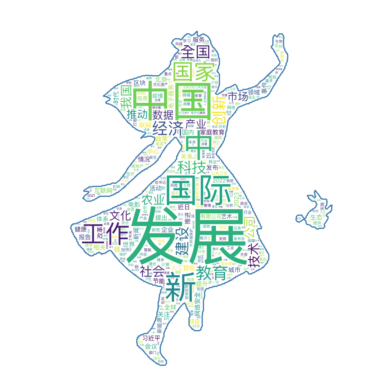

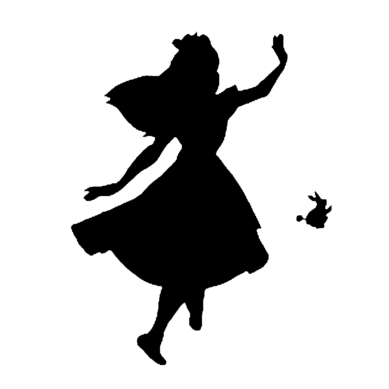

In [6]:
#词云展示
import numpy as np
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import os

# 获取脚本所在的目录
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

alice_mask = np.array(Image.open(path.join(d, "./alice_mask.png")))
wc = WordCloud(font_path='/System/Library/Fonts/PingFang.ttc', background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

#生成词云文本
word_frequence = {x[0]:x[1] for x in words_count.head(500).values}
wc.fit_words(word_frequence)

#根据图片遮罩形成图像文件
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
#TF-IDF分析文章的重要词
import jieba.analyse
index = 2400
#把分词的结果组合形成句子
content_S_str = "".join(content_S[index])
print(content_S_str)
print(" ".join(jieba.analyse.extract_tags(content_S_str, topK = 5, withWeight = False)))

近日,工业和信息化部印发《工业互联网专项工作组2023年工作计划》提出,深化“5G+工业互联网”发展,制定实施“5G+工业互联网”512升级版工作方案。   我国已建成全球规模最大、技术最先进的5G网络,工业互联网产业规模已超1.2...
5G 互联网 工业 2023 512


In [10]:
#分类任务标签处理
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df_news['keyword']})
df_train.tail()
df_train.label.unique()
label_mapping = {
    '国际政治': 1, '国内新闻': 2, '科技创新': 3, '股市动态': 4, '教育改革': 5, '健康医疗': 6, '体育赛事': 7,
    '娱乐明星': 8, '环境保护': 9, '旅游攻略': 10, '美食推荐': 11, '时尚潮流': 12, '历史纪事': 13, '军事动态': 14,
    '法律法规': 15, '网络安全': 16, '区块链': 17, '人工智能': 18, '新能源汽车': 19, '房地产市场': 20, '农业发展': 21,
    '文化艺术': 22, '影视剧集': 23, '音乐节目': 24, '书籍推荐': 25, '财经政策': 26, '社会事件': 27, '公共交通': 28,
    '城市规划': 29, '就业情况': 30, '教育资源': 31, '健身指南': 32, '心理咨询': 33, '宠物护理': 34, '家庭教育': 35,
    '数码产品': 36, '电子商务': 37, '互联网+': 38, '电影院线': 39, '航空航天': 40, '节能减排': 41, '公共卫生': 42,
    '生物科技': 43, '节日庆典': 44, '非物质文化遗产': 45, '自然灾害': 46, '国际关系': 47, '海外投资': 48, '创业故事': 49,
    '云计算': 50, '数据分析': 51, '物联网': 52, '虚拟现实': 53, '机器学习': 54, '经济': 55, 'Apple': 56
}
df_train['label'] = df_train['label'].map(label_mapping)
df_train['label']

,contents_clean,label
4639,"[西门子, 医疗, 规划, 中, teamplay, 平台, 相当于, Apple, , ...",Apple
4642,"[研发, , 苹果, 无创, 血糖, 监测, 「, 登月, 级, 项目, 重大突破, 不为...",Apple
4643,"[AirPods, , Pro, , 继承, 苹果, 音频设备, 支持, 无损, 音频,...",Apple
4645,"[想, 引用, 苹果, 官, 网上, 抛光, 布, 描述, 这块, 抛光, 布可, 清洁, ...",Apple
4647,"[苹果, , Apple, , Music, 主流, 第三方, 音乐, 视频, , A...",Apple


array(['国际政治', '国内新闻', '科技创新', '股市动态', '教育改革', '健康医疗', '体育赛事', '娱乐明星',
       '环境保护', '旅游攻略', '美食推荐', '时尚潮流', '历史纪事', '军事动态', '法律法规', '网络安全',
       '区块链', '人工智能', '新能源汽车', '房地产市场', '农业发展', '文化艺术', '影视剧集', '音乐节目',
       '书籍推荐', '财经政策', '社会事件', '公共交通', '城市规划', '就业情况', '教育资源', '健身指南',
       '心理咨询', '宠物护理', '家庭教育', '数码产品', '电子商务', '互联网+', '电影院线', '航空航天',
       '节能减排', '公共卫生', '生物科技', '节日庆典', '非物质文化遗产', '自然灾害', '国际关系', '海外投资',
       '创业故事', '云计算', '数据分析', '物联网', '虚拟现实', '机器学习', '经济', 'Apple'],
      dtype=object)

0        1
1        1
5        1
6        1
7        1
        ..
4639    56
4642    56
4643    56
4645    56
4647    56
Name: label, Length: 3644, dtype: int64

In [12]:
#切分训练集和测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state = 77)
#提取文本特征
#获取训练集文本
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[0]
print (len(words))
#通过词袋模型处理文本特征
from sklearn.feature_extraction.text import CountVectorizer
texts = ['dog cat fish', 'dog cat cat', 'fish bird', 'bird']
#统计词频
cv = CountVectorizer()
#转换数据(向量矩阵)
cv_fit = cv.fit_transform(texts)
print(cv.get_feature_names_out())
print(cv_fit.toarray())

'2022   届 本科 毕业生 中 师范生 毕业 去向 落实率 96.89% 比非 师范生 毕业 去向 落实率 93.82% 高 3.07% 落实率 师范生 灵活 就业率 升学率 高于 非 师范生 协议 合同 就业率 创业'

2733
['bird' 'cat' 'dog' 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]


In [13]:
#改进词袋模型(让词之间配对)
from sklearn.feature_extraction.text import CountVectorizer
texts = ['dog cat fish', 'dog cat cat', 'fish bird', 'bird']
cv = CountVectorizer(ngram_range=(1,4))
cv_fit = cv.fit_transform(texts)
print(cv.get_feature_names_out())
print(cv_fit.toarray())

['bird' 'cat' 'cat cat' 'cat fish' 'dog' 'dog cat' 'dog cat cat'
 'dog cat fish' 'fish' 'fish bird']
[[0 1 0 1 1 1 0 1 1 0]
 [0 2 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]]


In [21]:
#使用真训练集看看效果
vec = CountVectorizer(analyzer = 'word', max_features = 4000, lowercase = False)
feature = vec.fit_transform(words)
feature.shape
#测试词提取
test_words = []
for line_index in range(len(x_test)):
    try:
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
test_words[0]
#贝叶斯模型
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(feature, y_train)
classifier.score(vec.transform(test_words), y_test)

(2733, 4000)

'华东 交通 大学 音乐厅 美术馆 咖啡厅 场所 立足 学校 服务 社会 传播 文化 发展 目标 校园文化 建设 艺术 传播 载体 师生 打造 一系列 人文 艺术 素养 教育 平台 举办 多元 高雅 文化 艺术 活动 吸引 莘莘'

MultinomialNB()

0.8243688254665203

In [34]:
#其他评估指标
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_pred = classifier.predict(vec.transform(test_words))
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
print(round(precision,2))
print(round(recall,2))
print(round(f1,2))
print(conf_matrix)

0.81
0.74
0.74
[[16  0  0 ...  0  0  0]
 [ 0 22  1 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  4 ...  0  2  0]
 [ 0  0  0 ...  0  0  9]]


/Users/ling/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#制作Tfid特征
from sklearn.feature_extraction.text import TfidfVectorizer

X_test = ['卡尔 敌法师 蓝胖子 小小','卡尔 敌法师 蓝胖子 痛苦女王']

tfidf=TfidfVectorizer()
weight=tfidf.fit_transform(X_test).toarray()
word=tfidf.get_feature_names_out()
print (weight)
for i in range(len(weight)):  
    print (u"第", i, u"篇文章的tf-idf权重特征")
    for j in range(len(word)):
        print (word[j], weight[i][j])

[[0.44832087 0.63009934 0.44832087 0.         0.44832087]
 [0.44832087 0.         0.44832087 0.63009934 0.44832087]]
第 0 篇文章的tf-idf权重特征
卡尔 0.44832087319911734
小小 0.6300993445179441
敌法师 0.44832087319911734
痛苦女王 0.0
蓝胖子 0.44832087319911734
第 1 篇文章的tf-idf权重特征
卡尔 0.44832087319911734
小小 0.0
敌法师 0.44832087319911734
痛苦女王 0.6300993445179441
蓝胖子 0.44832087319911734


In [37]:
#利用tfid特征来测试模型
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)
classifier.score(vectorizer.transform(test_words), y_test)
y_pred = classifier.predict(vectorizer.transform(test_words))
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
print(round(precision,2))
print(round(recall,2))
print(round(f1,2))
print(conf_matrix)

TfidfVectorizer(lowercase=False, max_features=4000)

MultinomialNB()

0.7497255762897914

0.66
0.61
0.6
[[15  0  0 ...  0  0  0]
 [ 0 22  1 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  1  4 ...  0  1  0]
 [ 0  0  0 ...  0  0  4]]


/Users/ling/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1. 这里tfid的测试数据是更低了，但是教材上是更高了，也许是数据集不同的原因